In [1]:
%load_ext autoreload
%autoreload 2

from gamblers_problem import *

Day 7 - Dynamic Programming

## Value Iteration

* Where policy iteration invovles evaluating the policy until convergence, then updating it once, value iteration does a single sweep of evaluation, and then updates the policy
* This can speed up convergence
* As only one sweep of evaluation is performed before policy improvement, both steps can be combined with this update rule:

$$
\begin{align}
v_{k+1}(s)&=\underset{a}{\operatorname{max}}\mathbb E\left[R_{t+1}+\gamma v_k(S_{t+1})|S_t=s,A_t=a\right] \\
&=\underset{a}{\operatorname{max}}\sum_{s',r}p(s',r|s,a)\left[r+\gamma v_k(s')\right]
\end{align}
$$
* Once this converges, the policy which is greedy with respect to the value estimate can be returned
* This is the Bellman optimality equation, used as an update rule
* Convergence can be even faster if multiple evaluation sweeps are done before updating the policy
* In practice, that means performing the $\operatorname{max}$ operation on every $n$-th step, for some arbitrarily chosen $n\in\mathbb N$

### $Exercise\ \mathcal{4.8}$

#### Why does the optimal policy for the gambler’s problem have such a curious form? In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does not. Why is this a good policy?

While sweeping through the states, no state below $\$50$ can reach any state with an updated value estimate on the first sweet, so their values stay 0. Starting from $\$50$, the winning state can be reached with probability $p_h$, so that becomes the new value estimate. Starting with $\$75$, not only can the winning state be reached, but betting $\$25$ and losing now falls to $\$50$, which already has a value estimate $>0$, so now the state values are even higher. This continues until losing a bet falls back to $\$75$ or higher, and so on. With more and more sweeps, these halfway points keep propagating, making the policy spikier.

### $Exercise\ \mathcal{4.9}\ (programming)$

#### Implement value iteration for the gambler’s problem and solve it for $p_h=0.25$ and $p_h=0.55$. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta\rightarrow0$?

Results are not stable for $p_h<0.5$ with decreasing $\theta$, as this increases the number of sweeps, propagating information further and further. With $p_h>0.5$, the optimal strategy is always to bet, and therefore risk, the minimal amount, avoiding ruin while gaining money in expectation.

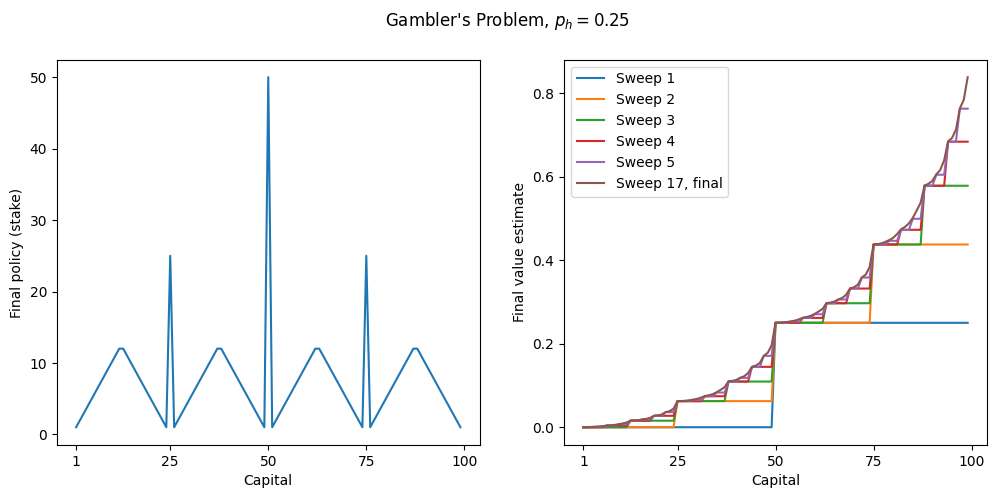

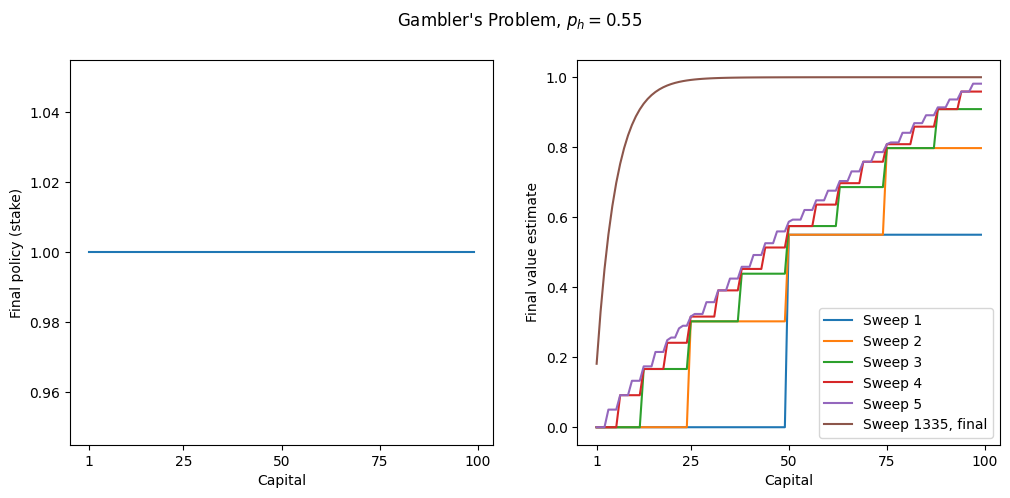

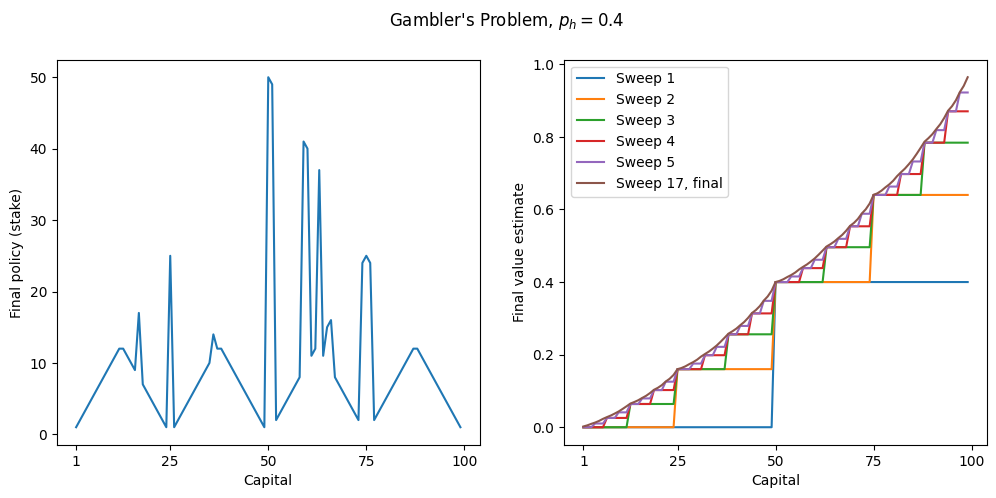

In [10]:
for p_h in [0.25, 0.55, 0.4]:
    it = run_gamblers_problem(p_h)
    plot_gamblers_problem(it, p_h)

### $Exercise\ \mathcal{4.10}$

#### What is the analog of the value iteration update (4.10) for action values, $q_{k+1}(s,a)$?

$$
\begin{align}
q_{k+1}(s,a)&=\mathbb E\left[r+\gamma\underset{a'}{\operatorname{max}}q_k(s',a')|S_t=s,A_t=a\right] \\
&=\sum_{s',r}p(s',r|s,a)\left[r+\gamma\underset{a'}{\operatorname{max}}q_k(s',a')\right]
\end{align}
$$

## Asynchronous Dynamic Programming

* Instead of performing a systematic sweep through the state space, values can be updated in any order
* Each sweep may even update only a single state's value, as long as all states are asymptotically visited an infinite number of times
* This allows focusing updates on relevant states, for example the states an agent is actually experiencing during interaction with the environment

## Generalized Policy Iteration

*